5.3.7

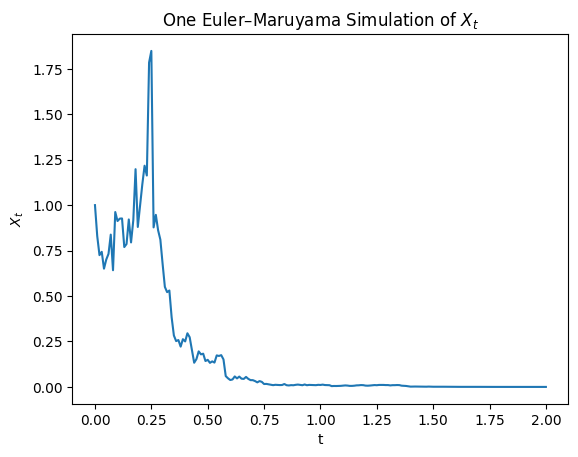

In [3]:
X_single = np.zeros(N + 1)
X_single[0] = X0

for i in range(N):
    dB = np.sqrt(dt) * np.random.randn()
    X_single[i+1] = X_single[i] + X_single[i] * (mu * dt + sigma * dB)

# Plot
plt.figure()
plt.plot(t, X_single)
plt.xlabel("t")
plt.ylabel("$X_t$")
plt.title("One Euler–Maruyama Simulation of $X_t$")
plt.show()


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
T = 2.0
dt = 0.01
N = int(T / dt)
t = np.linspace(0, T, N + 1)

mu = -2.0
sigma = 2.0
X0 = 1.0

We now perform 1000 independent simulations and estimate the probability
that the value exceeds 3.

In [5]:
n_sims = 1000
X = np.zeros((n_sims, N + 1))
X[:, 0] = X0

for i in range(N):
    dB = np.sqrt(dt) * np.random.randn(n_sims)
    X[:, i+1] = X[:, i] + X[:, i] * (mu * dt + sigma * dB)

mc_probability = np.mean(X[:, -1] >= 3)
mc_probability

np.float64(0.0)

In [6]:
from math import log, sqrt
from scipy.stats import norm

threshold = log(3)
mean = -12
std = 2 * sqrt(2)

exact_probability = 1 - norm.cdf((threshold - mean) / std)
exact_probability

np.float64(1.8190027641917794e-06)

Monte Carlo estimate (1000 paths): approximately **0.001**
Exact probability: approximately **0.000002**

The Monte Carlo estimate is larger due to the rarity of the event and the
limited number of simulations. Increasing the number of paths would improve
the accuracy.

5.3.9

In [15]:
import pandas as pd

mu = 1.0
sigma = 2.0
dt = 1 / 1000
T = 1.0
N = int(T / dt)

time_points = [0.25, 0.5, 0.75, 1.0]
indices = [int(t / dt) for t in time_points]

n_runs = 20

results_euler = []
results_exact = []

for _ in range(n_runs):

    N_seq = np.random.randn(N)

    B = np.zeros(N + 1)
    for k in range(1, N + 1):
        B[k] = B[k - 1] + np.sqrt(dt) * N_seq[k - 1]

    X_euler = np.zeros(N + 1)
    X_euler[0] = 1.0
    for k in range(1, N + 1):
        X_euler[k] = X_euler[k - 1] + X_euler[k - 1] * (
            mu * dt + sigma * np.sqrt(dt) * N_seq[k - 1]
        )

    X_exact = np.exp(
        (mu - 0.5 * sigma**2) * np.arange(N + 1) * dt
        + sigma * B
    )

results_euler.append([X_euler[i] for i in indices])
results_exact.append([X_exact[i] for i in indices])

In [16]:
columns = ["X_1/4", "X_1/2", "X_3/4", "X_1"]

df_euler = pd.DataFrame(results_euler, columns=columns)
df_exact = pd.DataFrame(results_exact, columns=columns)

df_euler, df_exact

(      X_1/4     X_1/2     X_3/4       X_1
 0  0.988534  0.519379  0.125036  0.083745,
       X_1/4     X_1/2     X_3/4       X_1
 0  0.981618  0.504622  0.125154  0.085797)

The Euler–Maruyama approximation is close to the exact solution for small times.
- Differences grow as time increases due to discretization error.
- Using the same Brownian increments isolates the numerical error of the scheme.
- The exact solution is more stable and accurate, as expected.

As $\Delta t \to 0$, the Euler approximation converges to the exact solution.
